### k-NN Algorithm

Provided Iris data set and k-NN applied to it. Two parameters are interesting: (i) the split which is the size of the training subset v test subset (split = .67) means roughly 2/3rds training, 1/3rd testing, (ii) k which is the size of nearest neighbours. Note, the Accuracy of model is determined for test sets; it measures how well it classifications work for the unseen set.

In [3]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.9
    loadDataset(r"iris.csv", split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 2
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    
main()

Train set: 134
Test set: 15
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-versicolor', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
Accuracy: 93.33333333333333%


## Split values:[0.2,0.4,0.6,0.8]
## For every split, k is [1,5,10,15,20]



Train set: 30
Test set: 119

Accuracy for split= 0.2 and k= 20 is:  [97.47899159663865, 94.9579831932773, 94.9579831932773, 55.46218487394958, 30.252100840336134]%


Train set: 62
Test set: 87

Accuracy for split= 0.4 and k= 20 is:  [94.25287356321839, 96.55172413793103, 94.25287356321839, 93.10344827586206, 94.25287356321839]%


Train set: 93
Test set: 56

Accuracy for split= 0.6 and k= 20 is:  [96.42857142857143, 96.42857142857143, 96.42857142857143, 92.85714285714286, 94.64285714285714]%


Train set: 121
Test set: 28

Accuracy for split= 0.8 and k= 20 is:  [92.85714285714286, 92.85714285714286, 92.85714285714286, 89.28571428571429, 89.28571428571429]%


<Figure size 3600x1800 with 0 Axes>

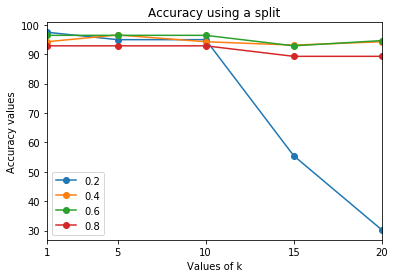

In [5]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator
import matplotlib.pyplot as plt
import pandas as pd

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # prepare data
    accuracy_dict = {}
    split = [0.2, 0.4, 0.6, 0.8]
    for i in split:
        trainingSet=[]
        testSet=[]
        accuracy = []
        loadDataset(r"iris.csv", i, trainingSet, testSet)
        print('\n\nTrain set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        # generate predictions
       
        k = [1,5,10,15,20]
        for j in k:
            predictions=[]
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], j)
                result = getResponse(neighbors)
                predictions.append(result)
                #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
            accuracy.append(getAccuracy(testSet, predictions))
            accuracy_dict[i] = accuracy
        print('\nAccuracy for split=',i ,'and k=',j,'is: ',repr(accuracy) + '%')
   
    dframe = pd.DataFrame(accuracy_dict, index = k)
    #print(dframe)
    
    plt.figure(dpi = 200, figsize = (18,9))
    dframe.plot(marker = 'o')
    plt.title('Accuracy using a split')
    plt.xlabel('Values of k')
    plt.ylabel('Accuracy values')
    plt.xticks([1,5,10,15,20]) 
    
main()

## 5 Fold Cross validation
Taking ideas about cross-validation into account; systematically vary the size of the split ; exploring a decent number of other values for it >0.0 and <0.9. Also to systematically vary k on five selected values between 1 and 20.

In [6]:
dframe = pd.read_csv(r"iris_crossVal.csv", header= None)
y = dframe.iloc[:,-1]
X = dframe.iloc[:,:-1]
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dframe_dict = {}
mean_list = []

In [8]:
kNN_k = 1
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = mean_list[0]
#print(dframe_dict)


5x CV Accuracy kNNs: 0.96


In [9]:
kNN_k = 5
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean()))  
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.97


In [10]:
kNN_k = 10
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean()))  
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.98


In [11]:
kNN_k = 15
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.97


In [12]:
kNN_k = 20
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.96


### Then plot the accuracy in a graph for these parameter changes Now, using this data set, describe an algorithm for doing a 5-fold cross validation on this data set. See can you implement it in Python.

    Accuracy
1   0.960000
5   0.973333
10  0.980000
15  0.966667
20  0.960000


([<matplotlib.axis.XTick at 0x231d5b6bdd8>,
 <a list of 5 Text xticklabel objects>)

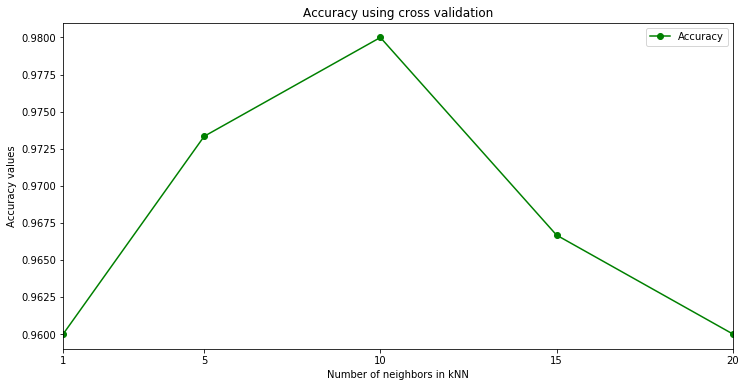

In [13]:
df = pd.DataFrame(mean_list, index = [1,5,10,15,20],columns = ['Accuracy'])
print(df)
df.plot(figsize = (12,6), marker = 'o', color = 'green')
plt.title('Accuracy using cross validation')
plt.xlabel('Number of neighbors in kNN')
plt.ylabel('Accuracy values')
plt.xticks([1,5,10,15,20])